# Predicting Data Science Salaries - Linear Regression

### Pretext
Updating the linear regression model of my previous attempt. 

Now that I have more knowledge and understanding of the topic machine learning and the fundamentals of data, I expect a better prediction model

### Code
We want to predict the salary of data scientists using a general linear regression model. 

#### Data 
- Data file name: `ds_salaries.csv`
- source: n/a
- downloaded: n/a

#### Import packages

In [254]:
# basic packages
import pandas as pd
import numpy as np
# plots and visuals
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.regressor import ResidualsPlot
# statistical tests
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# shows more columns
pd.set_option('display.max_columns', 500)

#### Read data

In [102]:
raw_data = pd.read_csv("ds_salaries.csv")
data = raw_data.copy()

### Initial Data Inspection
We start by doing an initial data inspection to get a feel on the data before we do some analysis and modelling.

#### Size of Data

In [103]:
num_rows, num_cols = data.shape
print('The data has {} rows and {} columns'.format(num_rows, num_cols))

The data has 607 rows and 12 columns


#### Basic info about data

In [104]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


#### Data Types

In [105]:
# data types
print(data.dtypes)

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


#### First look on data

In [106]:
# show first five rows
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [107]:
# show last five rows
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


#### Statistical info about data

In [108]:
print(data.describe())

       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


#### Check for missing values

In [109]:
print(data.isnull().any())

Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool


#### Check for duplicate entries

In [110]:
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool


In [111]:
data = data.drop_duplicates()

#### Unique values

In [112]:
data.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

#### Remove unnecessary columns

In [114]:
data = data.drop(['Unnamed: 0', 'salary', 'salary_currency', 'employee_residence'], axis = 1)

num_rows, num_cols = data.shape
print('The data has {} rows and {} columns'.format(num_rows, num_cols))

The data has 607 rows and 8 columns


### Data Visualization

In [115]:
# get all numerical data columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

print(numeric_columns.shape)

# Print the numerical columns
print(numeric_columns)

(607, 3)
     work_year  salary_in_usd  remote_ratio
0         2020          79833             0
1         2020         260000             0
2         2020         109024            50
3         2020          20000             0
4         2020         150000            50
..         ...            ...           ...
602       2022         154000           100
603       2022         126000           100
604       2022         129000             0
605       2022         150000           100
606       2022         200000           100

[607 rows x 3 columns]


#### Boxplot - numeric columns

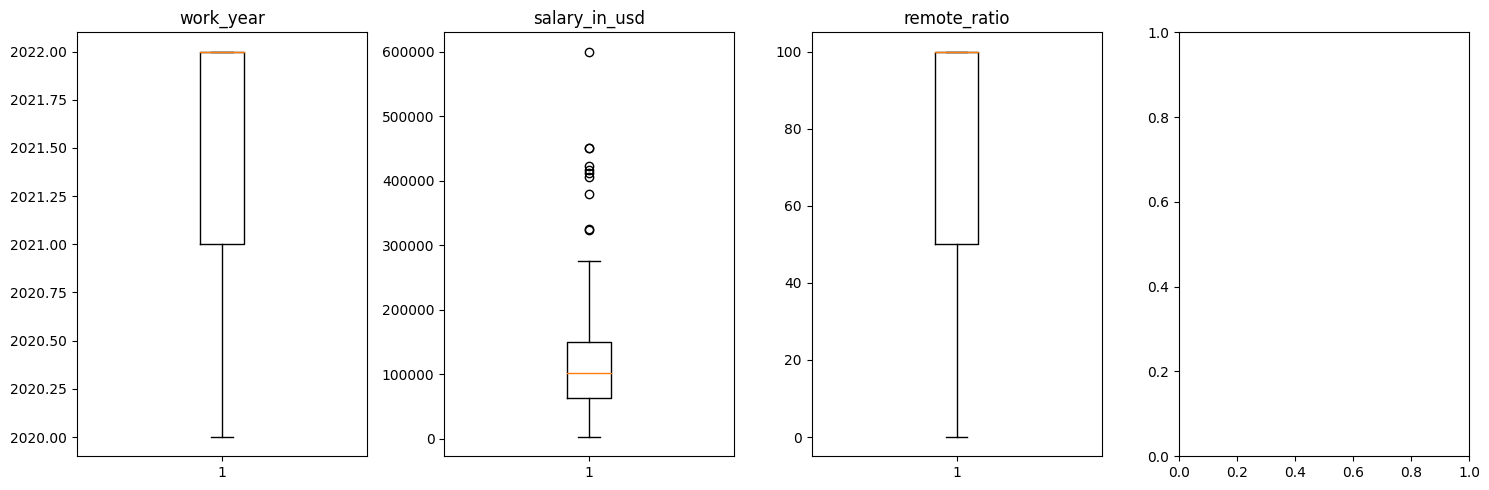

In [116]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the columns and create a boxplot for each one
for i, col in enumerate(numeric_columns.columns):
    ax = axs[i]
    ax.boxplot(numeric_columns[col])
    ax.set_title(col)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [117]:
data.loc[(data['salary_in_usd'] > 500000)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,100,US,L


In [118]:
# Select only the rows with salary_in_usd less than or equal to 500000
data = data.loc[data['salary_in_usd'] <= 500000]

numeric_columns = data.select_dtypes(include=['int64', 'float64'])

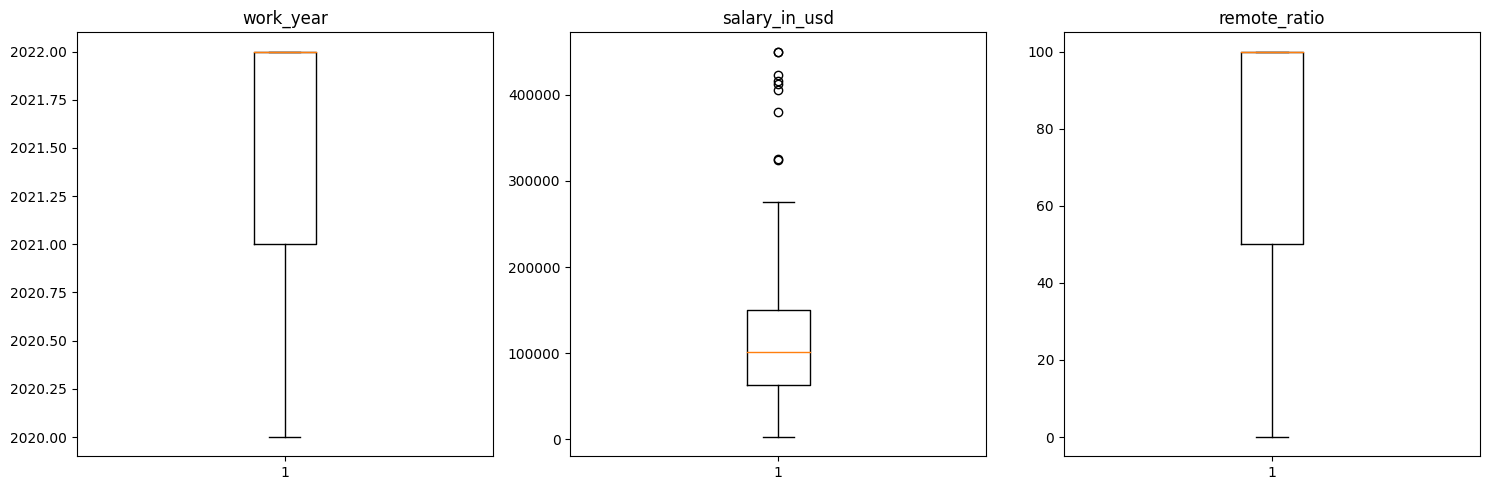

In [120]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the columns and create a boxplot for each one
for i, col in enumerate(numeric_columns.columns):
    ax = axs[i]
    ax.boxplot(numeric_columns[col])
    ax.set_title(col)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

#### Boxplot - nominal columns

In [121]:
# get all nominal columns
nominal_columns = data.select_dtypes(include='object')

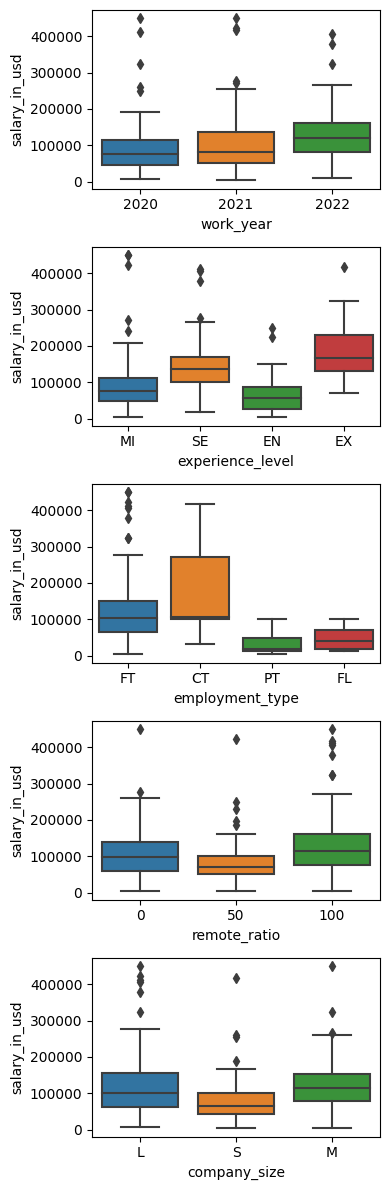

In [205]:
# Use the loc method to filter the Series and get the names of the columns with less than XX unique values
cols_with_few_unique_values = data.nunique().loc[lambda x: x < 50].index

columns = cols_with_few_unique_values

# Create a figure with 3 subplots
fig, axs = plt.subplots(len(columns), 1, figsize=(4, 12))

# Loop through the columns and create a scatter plot with a fitted regression line for each column
for ax, column in zip(axs, columns):
    sns.boxplot(x=column, y='salary_in_usd', data=data, ax=ax)
    
    if data[column].nunique() > 10:
        # Rotate the x-axis labels by 90 degrees
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Show the plot
plt.tight_layout()
plt.show()

#### Histogram

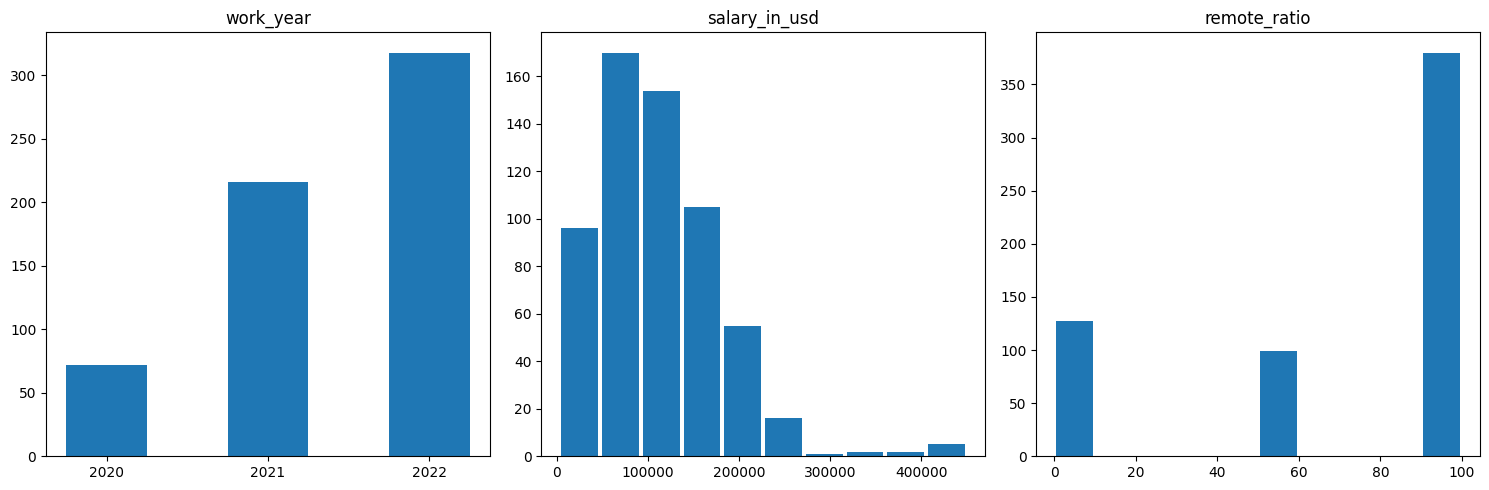

In [153]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the columns and create a histogram for each one
for i, col in enumerate(numeric_columns.columns):
    ax = axs[i]
    if col == "work_year":
        ax.hist(numeric_columns[col], bins = [2019.5,2020.5,2021.5,2022.5], rwidth=0.5)
        ax.set_xticks([2020,2021,2022])
        ax.set_xticklabels([2020,2021,2022])
    else:
        ax.hist(numeric_columns[col], rwidth = 0.9)
    ax.set_title(col)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

<AxesSubplot: >

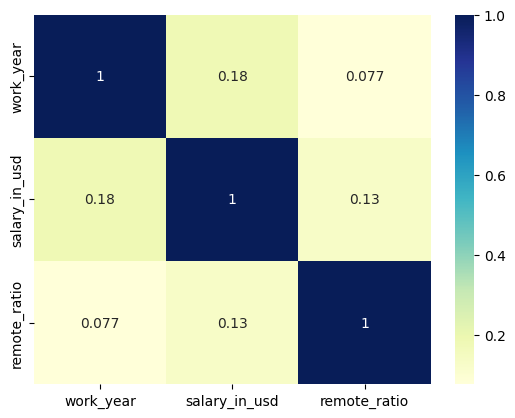

In [125]:
corr = data.corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")

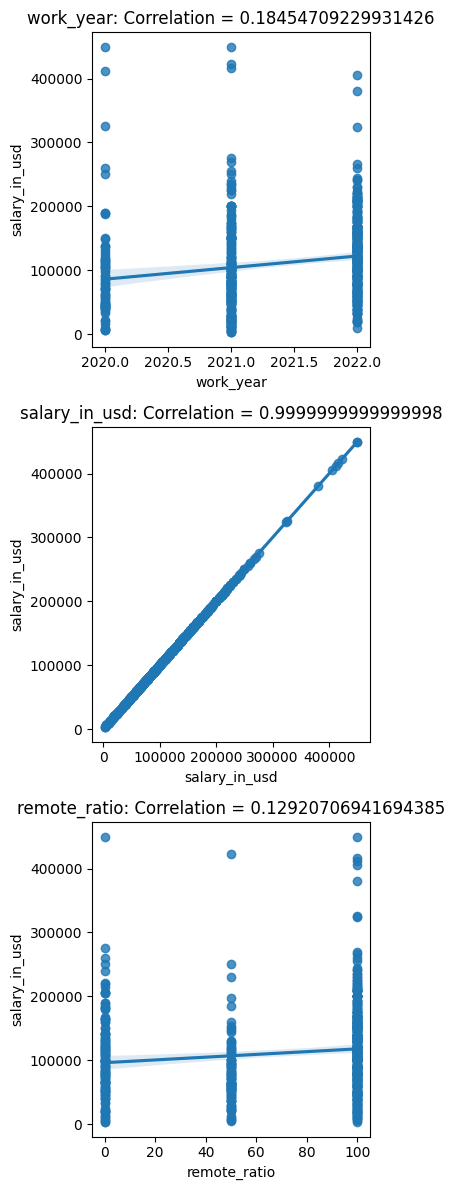

In [156]:
columns = numeric_columns.columns

# Create a figure with 3 subplots
fig, axs = plt.subplots(len(columns), 1, figsize=(4, 12))

# Loop through the columns and create a scatter plot with a fitted regression line for each column
for ax, column in zip(axs, columns):
    sns.regplot(x=column, y='salary_in_usd', data=data, ax=ax)
    
    # Calculate the Pearson correlation coefficient
    corr = data[column].corr(data['salary_in_usd'])
    
    # Set the title for the plot
    ax.set_title(f'{column}: Correlation = {corr}')


# Show the plot
plt.tight_layout()
plt.show()

### Statistical Tests

#### Chi-Squared test
The chi-squared test is a statistical test that measures the association between two categorical variables. It can be used to test whether there is a significant difference between the observed frequencies of the categories in the two variables, or whether the two variables are independent of each other.

In [159]:
for column in nominal_columns:
    # Create a contingency table of the column and salary_in_usd
    contingency_table = pd.crosstab(column, data['salary_in_usd'])

    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f'chi2 for {column} and salary_in_usd: {chi2}')
    print(f'p for {column} and salary_in_usd: {p}\n')

chi2 for experience_level and salary_in_usd: 0.0
p for experience_level and salary_in_usd: 1.0

chi2 for employment_type and salary_in_usd: 0.0
p for employment_type and salary_in_usd: 1.0

chi2 for job_title and salary_in_usd: 0.0
p for job_title and salary_in_usd: 1.0

chi2 for company_location and salary_in_usd: 0.0
p for company_location and salary_in_usd: 1.0

chi2 for company_size and salary_in_usd: 0.0
p for company_size and salary_in_usd: 1.0



.. Yeah **chi-squared** is only used on **two categorical columns**. In my case I used categorical column with a numerical column -> hence the lack of significance.

#### t-test

In [163]:
nominal_columns

,experience_level,employment_type,job_title,company_location,company_size
0,MI,FT,Data Scientist,DE,L
1,SE,FT,Machine Learning Scientist,JP,S
2,SE,FT,Big Data Engineer,GB,M
3,MI,FT,Product Data Analyst,HN,S
4,SE,FT,Machine Learning Engineer,US,L
...,...,...,...,...,...
602,SE,FT,Data Engineer,US,M
603,SE,FT,Data Engineer,US,M
604,SE,FT,Data Analyst,US,M
605,SE,FT,Data Analyst,US,M


In [188]:
# Get a list of all nominal columns
nominal_columns = data.select_dtypes(include='object')

# Loop through the nominal columns and perform a t-test with salary_in_usd
for column in nominal_columns:
    # Get the name of the column
    #column = nominal_columns.iloc[i]

    # Split the data into two groups based on the column
    group1 = data[data[column] == data[column].unique()[0]]['salary_in_usd']
    group2 = data[data[column] == data[column].unique()[1]]['salary_in_usd']

    # Perform the t-test
    t, p = ttest_ind(group1, group2)

    print(f't for {column} and salary_in_usd: {t}')
    print(f'p for {column} and salary_in_usd: {p}\n')

t for experience_level and salary_in_usd: -9.210292076278856
p for experience_level and salary_in_usd: 9.45037295337636e-19

t for employment_type and salary_in_usd: -2.3703751795374823
p for employment_type and salary_in_usd: 0.018090541772906282

t for job_title and salary_in_usd: -2.1294853652368255
p for job_title and salary_in_usd: 0.034857457197543046

t for company_location and salary_in_usd: -1.466575786347232
p for company_location and salary_in_usd: 0.1522508126424419

t for company_size and salary_in_usd: 3.9954712848939726
p for company_size and salary_in_usd: 8.274556911961275e-05



### Evaluation
- experience_level: significant difference with good p-value (worth considering)
- employment_type: significant difference with good p-value (worth considering)
- job_title: significant difference with good p-value (worth considering)
- company_location: insignifact with bad p-value (to be removed)
- company_size: significant difference with good p-value (worth considering)

In [231]:
nominal_columns_old = nominal_columns.copy()
nominal_columns = nominal_columns.drop(['company_location'], axis=1)

#### ANOVA 

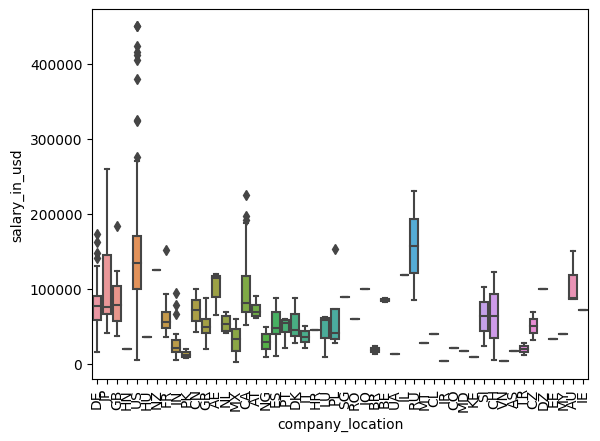

In [206]:
# Create a box plot
sns.boxplot(data=data, x='company_location', y='salary_in_usd')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [232]:
# Loop through the nominal columns
for column in nominal_columns:
    # Extract the data for each group
    group1 = data[data[column] == data[column].unique()[0]]['salary_in_usd']
    group2 = data[data[column] == data[column].unique()[1]]['salary_in_usd']
    group3 = data[data[column] == data[column].unique()[2]]['salary_in_usd']
    
    # Perform the ANOVA
    f_statistic, p_value = f_oneway(group1, group2, group3)
    
    print(f'F-statistic for {column}: {f_statistic}')
    print(f'p-value for {column}: {p_value}\n')  
    

F-statistic for experience_level: 78.90773192453521
p-value for experience_level: 5.022617582688174e-31

F-statistic for employment_type: 9.847415641054647
p-value for employment_type: 6.196196720628079e-05

F-statistic for job_title: 5.531268252168708
p-value for job_title: 0.004776954821047457

F-statistic for company_size: 12.300837311082997
p-value for company_size: 5.806512266700239e-06



In [ ]:
#One-Way-Anova: Is there a significant difference between fighter's height based on the result of the competition??!
sns.boxplot(data=nominal_columns, x='result', y='height')

In [243]:
# ANOVA 

for column in nominal_columns:
    str1 = column
    str2 = 'salary_in_usd'
    
    formula = str2 + ' ~ ' + f'C({str1})'
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    
    print(aov_table,'\n')

    # Show the plot
    plt.show()

                           sum_sq     df          F        PR(>F)
C(experience_level)  6.714309e+11    3.0  62.915838  2.150956e-35
Residual             2.141492e+12  602.0        NaN           NaN 

                          sum_sq     df         F    PR(>F)
C(employment_type)  1.051024e+11    3.0  7.788757  0.000041
Residual            2.707821e+12  602.0       NaN       NaN 

                    sum_sq     df         F        PR(>F)
C(job_title)  6.385509e+11   49.0  3.332271  4.961220e-12
Residual      2.174372e+12  556.0       NaN           NaN 

                       sum_sq     df          F    PR(>F)
C(company_size)  1.102652e+11    2.0  12.300837  0.000006
Residual         2.702658e+12  603.0        NaN       NaN 



In [245]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Linear Regression

In [266]:
# Select the columns to use as features
feature_columns = ['experience_level', 'employment_type', 'company_size', 'job_title']

# Create a ColumnTransformer to preprocess the categorical and nominal columns
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), feature_columns)],
    remainder='passthrough'
)

# Preprocess the data and split it into training and test sets
X = ct.fit_transform(data[feature_columns])
y = data['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [267]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f'R-squared score: {score}')

R-squared score: 0.14743625827186801


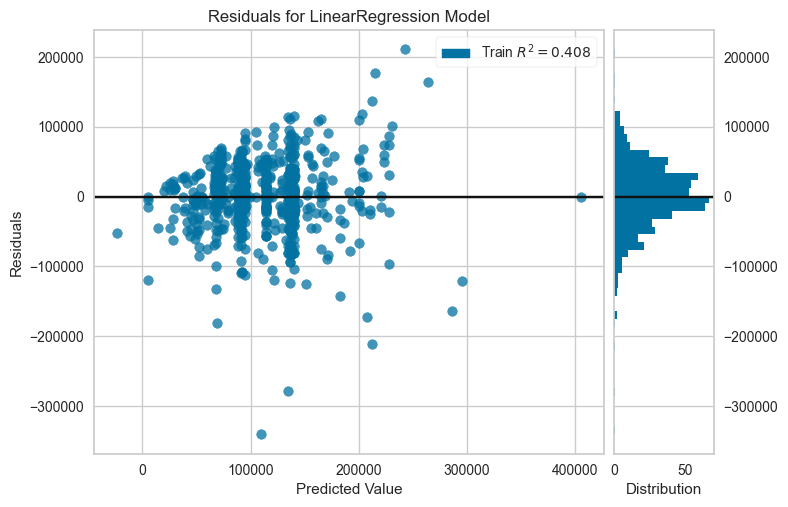

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [268]:
visualizer = ResidualsPlot(model)
visualizer.fit(X,y)
visualizer.poof()

In [314]:
data_new = pd.DataFrame(columns=data.columns)

data_new = data_new.append({'experience_level': 'MI', 'employment_type': 'CT', 'company_size': 'S', 'job_title': 'ML Engineer'}, ignore_index=True)

# Preprocess the new data using the same ColumnTransformer that was used to preprocess the original data
new_X = ct.transform(data_new[feature_columns])

# Make predictions using the transformed model
predictions = model.predict(new_X)

predictions

C:\Users\sian-\AppData\Local\Temp\ipykernel_11468\2038563205.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_new = data_new.append({'experience_level': 'MI', 'employment_type': 'CT', 'company_size': 'S', 'job_title': 'ML Engineer'}, ignore_index=True)


array([175563.1622374])

In [310]:
data.loc[(data['job_title'] == 'ML Engineer')]

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
45,2020,EN,PT,ML Engineer,15966,100,DE,S
78,2021,MI,CT,ML Engineer,270000,100,US,L
136,2021,MI,FT,ML Engineer,63711,50,JP,S
137,2021,MI,FT,ML Engineer,77364,50,JP,S
231,2021,SE,FT,ML Engineer,256000,100,US,S
449,2022,EN,FT,ML Engineer,21983,100,PT,L
